In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv


# Load the dataset

In [30]:
path_data=r'/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv'
df=pd.read_csv(path_data)

In [31]:
df.head()

,User_ID,Age,Gender,Sleep_Duration,Stress_Level,Diet_Type,Daily_Screen_Time,Exercise_Frequency,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
0,U1,57,Female,6.5,3,Non-Vegetarian,6.5,Medium,41,583.33,65,36.71,39.77
1,U2,39,Female,7.6,9,Non-Vegetarian,10.8,High,214,368.24,58,54.35,57.68
2,U3,26,Male,8.2,6,Vegetarian,5.7,Low,429,445.21,49,32.57,29.54
3,U4,32,Male,7.8,9,Vegetarian,8.3,Low,464,286.33,94,70.15,74.59
4,U5,50,Male,9.7,2,Non-Vegetarian,11.3,Medium,365,237.65,62,87.54,91.78


## about data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             80000 non-null  object 
 1   Age                 80000 non-null  int64  
 2   Gender              80000 non-null  object 
 3   Sleep_Duration      80000 non-null  float64
 4   Stress_Level        80000 non-null  int64  
 5   Diet_Type           80000 non-null  object 
 6   Daily_Screen_Time   80000 non-null  float64
 7   Exercise_Frequency  80000 non-null  object 
 8   Caffeine_Intake     80000 non-null  int64  
 9   Reaction_Time       80000 non-null  float64
 10  Memory_Test_Score   80000 non-null  int64  
 11  Cognitive_Score     80000 non-null  float64
 12  AI_Predicted_Score  80000 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 7.9+ MB


In [33]:
df.isna().sum()

User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

In [34]:
df.describe()

,Age,Sleep_Duration,Stress_Level,Daily_Screen_Time,Caffeine_Intake,Reaction_Time,Memory_Test_Score,Cognitive_Score,AI_Predicted_Score
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,38.525525,7.005333,5.493762,6.504646,248.988213,399.973579,69.498350,58.172395,58.121357
std,12.101876,1.734435,2.865308,3.167072,144.541990,115.369329,17.305659,23.058522,23.119598
min,18.000000,4.000000,1.000000,1.000000,0.000000,200.000000,40.000000,0.000000,0.000000
25%,28.000000,5.500000,3.000000,3.800000,123.000000,300.150000,55.000000,40.910000,40.850000
50%,39.000000,7.000000,5.000000,6.500000,249.000000,400.360000,70.000000,58.360000,58.360000
75%,49.000000,8.500000,8.000000,9.200000,375.000000,499.250000,85.000000,75.830000,75.890000
max,59.000000,10.000000,10.000000,12.000000,499.000000,599.990000,99.000000,100.000000,100.000000


# Data Visualizations

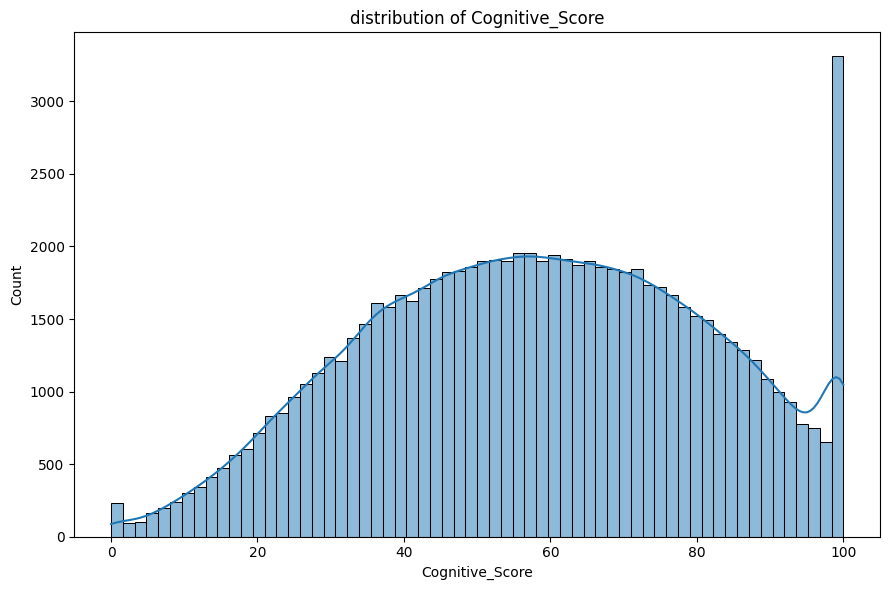

In [35]:
# histogram to show distribution

plt.figure(figsize=(9,6))
sns.histplot(df['Cognitive_Score'],kde=True)
plt.title("distribution of Cognitive_Score")
plt.tight_layout()
plt.show()

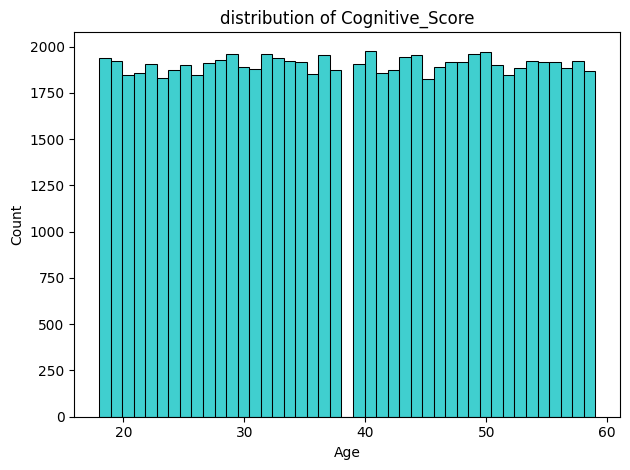

In [36]:
sns.histplot(df["Age"],color='c')
plt.title("distribution of Cognitive_Score")
plt.tight_layout()
plt.show()

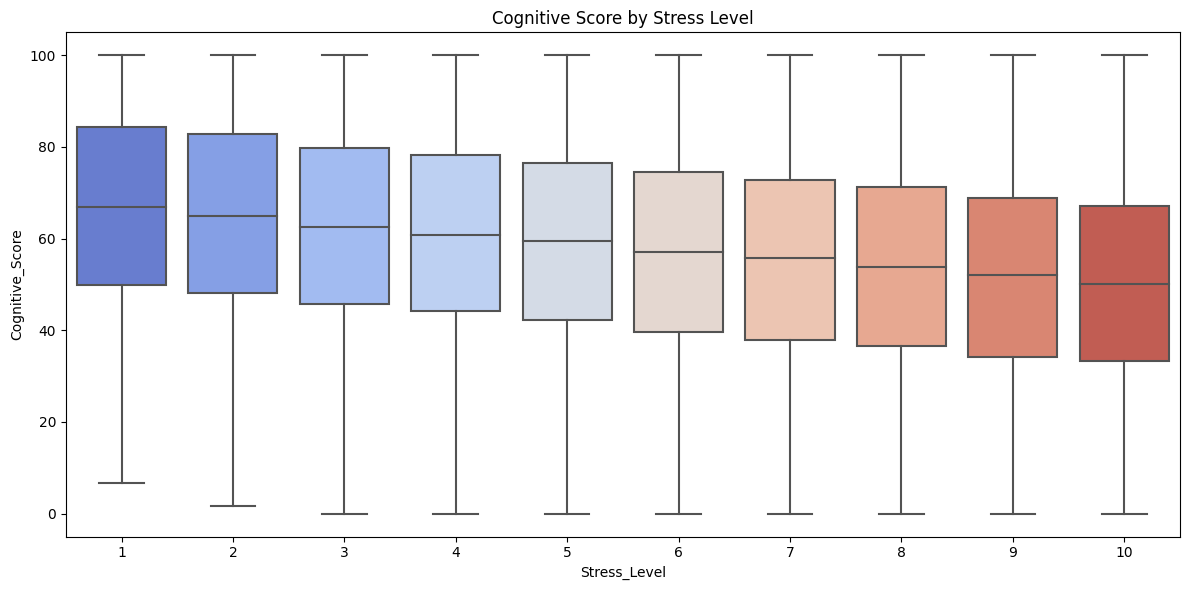

In [37]:
# boxplot
plt.figure(figsize=(12,6))
sns.boxplot(x='Stress_Level', y='Cognitive_Score', data=df, palette='coolwarm')
plt.title("Cognitive Score by Stress Level")
plt.tight_layout()
plt.show()

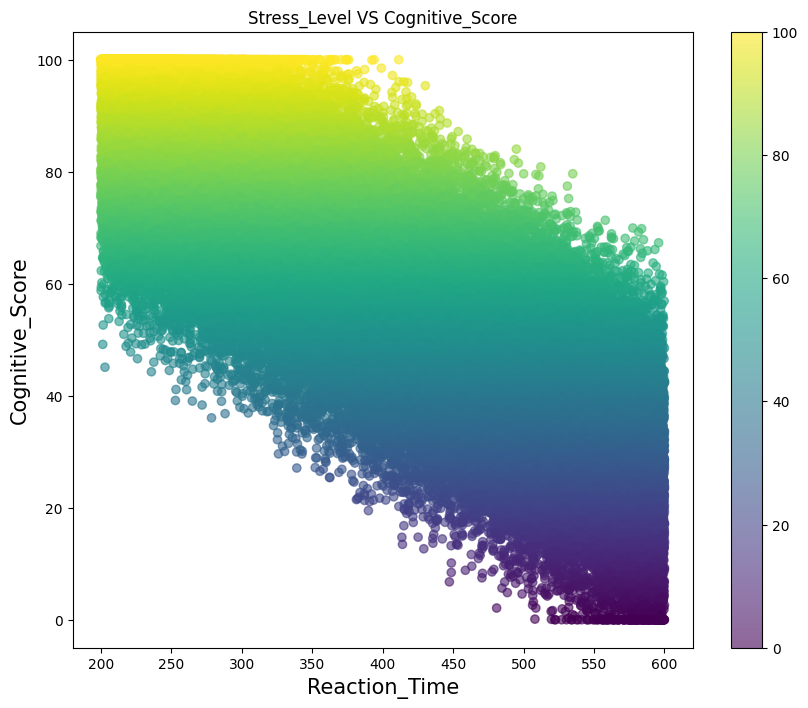

In [38]:
#scatter plot
plt.figure(figsize=(10,8))
sct_plot=plt.scatter(x=df['Reaction_Time'],y=df['Cognitive_Score'],c=df['Cognitive_Score'],cmap=plt.get_cmap('viridis'),alpha=.6)
plt.colorbar(sct_plot)

plt.xlabel('Reaction_Time',c='k',fontsize=15)
plt.ylabel('Cognitive_Score',c='k',fontsize=15)
plt.title('Stress_Level VS Cognitive_Score',color='k')

plt.show()

`We can see the reaction time increases the Cognitive_Score decreases There is an inverse relationship`

___

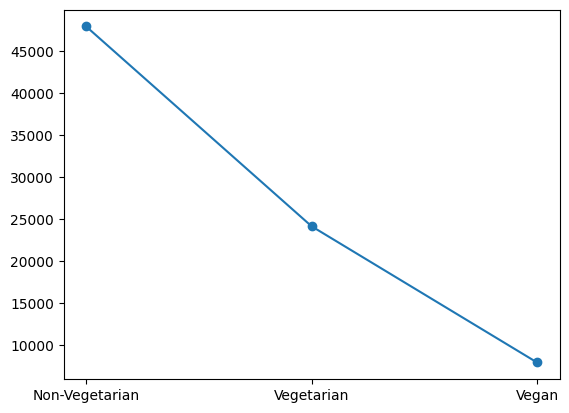

In [39]:
idx=df['Diet_Type'].value_counts().index
vals=df['Diet_Type'].value_counts().values

plt.plot(idx,vals,marker='o')

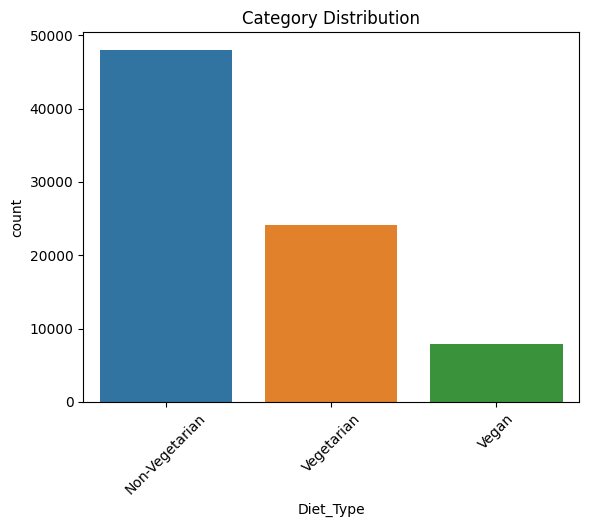

In [40]:
# count categort by bar plot
sns.countplot(data=df, x='Diet_Type')
plt.xticks(rotation=45)
plt.title('Category Distribution')
plt.show()

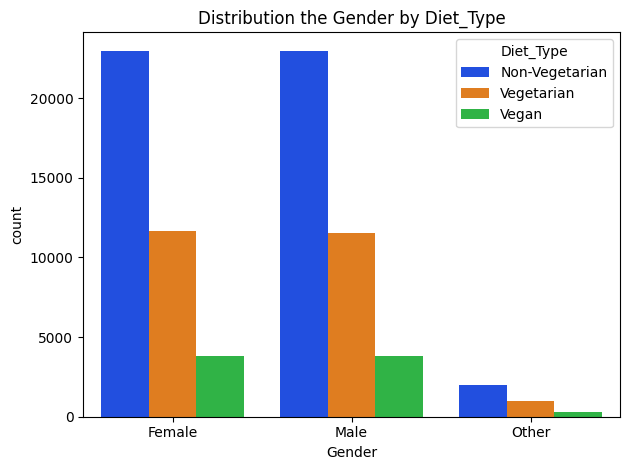

In [41]:
#bar plot
sns.countplot(x=df["Gender"],hue=df['Diet_Type'],palette="bright")

plt.title('Distribution the Gender by Diet_Type')

plt.tight_layout()
plt.show()

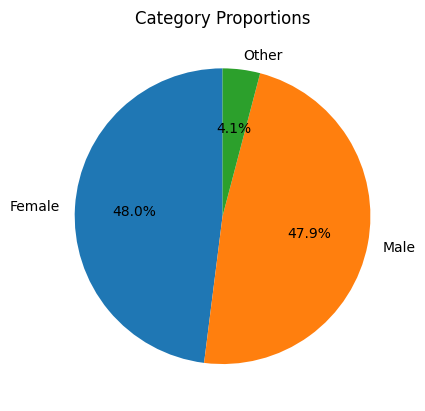

In [42]:
# pie plot
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title('Category Proportions')
plt.show()

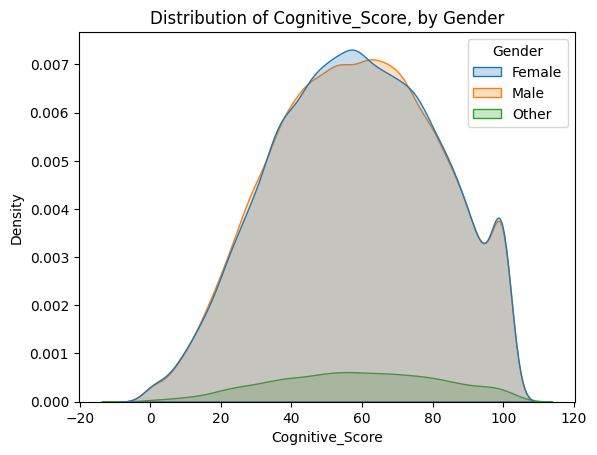

In [43]:
# kde plot
sns.kdeplot(data=df, x='Cognitive_Score', hue='Gender', shade=True)
plt.title("Distribution of Cognitive_Score, by Gender")
plt.show()

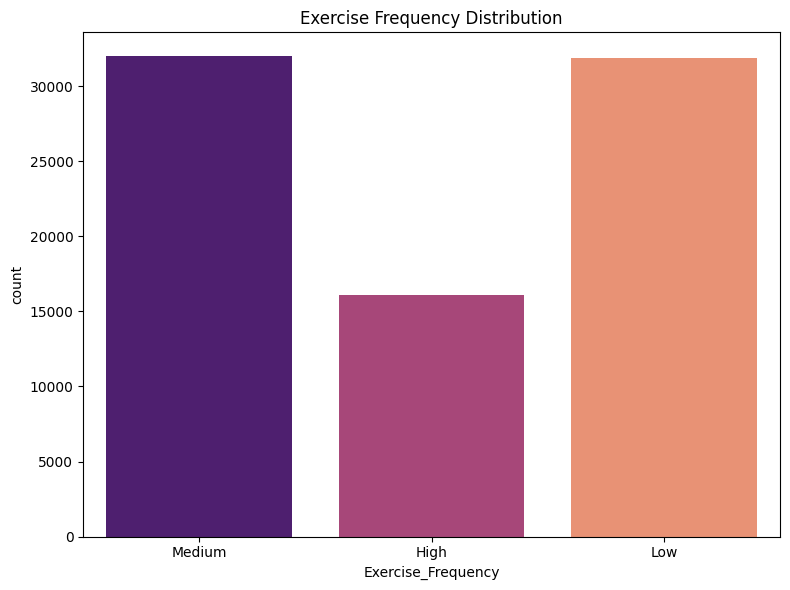

In [44]:
# bar plot
plt.figure(figsize=(8,6))
sns.countplot(x='Exercise_Frequency', data=df, palette='magma')
plt.title("Exercise Frequency Distribution")
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

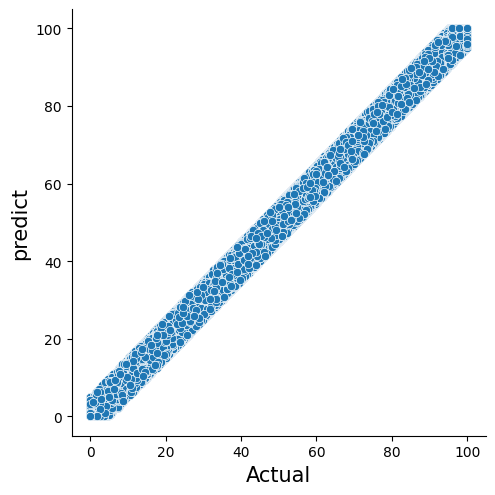

In [45]:
# relation or scatter plot
plt.figure(figsize=(10,6))

sns.relplot(x=df['Cognitive_Score'],y=df['AI_Predicted_Score'])
plt.xlabel("Actual",fontsize=15)
plt.ylabel("predict",fontsize=15)
plt.show()

In [46]:
# # Correlation Matrix
# plt.figure(figsize=(12, 6))
# corr = df.corr()
# sns.heatmap(corr, annot=True, cmap="coolwarm",fmt='.2f')
# plt.title("Correlation Heatmap", pad=20)
# plt.show()

# preprocess

In [47]:
df.drop(['User_ID','AI_Predicted_Score'],axis=1,inplace=True)

In [48]:
X=df.drop(columns=['Cognitive_Score']) 
y=df['Cognitive_Score']


In [49]:
# numrical column
num_col=[col for col in X.columns if X[col].dtype in ['int64','float64']]
num_col 

['Age',
 'Sleep_Duration',
 'Stress_Level',
 'Daily_Screen_Time',
 'Caffeine_Intake',
 'Reaction_Time',
 'Memory_Test_Score']

In [50]:
# category column
cat_col=[col for col in X.columns if X[col].dtype not in ['int64','float64']]
cat_col

['Gender', 'Diet_Type', 'Exercise_Frequency']

In [51]:
##Spliting

X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,test_size=.2,random_state=42)

X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full , test_size=.2,random_state=42)

print(X_train.shape)
print(y_train.shape)
print("===========")
print(X_valid.shape)
print(y_valid.shape)
print("===========")
print(X_test.shape)
print(y_test.shape)

(51200, 10)
(51200,)
(12800, 10)
(12800,)
(16000, 10)
(16000,)


## LabelEncoder

In [52]:
X_train_cate = X_train[cat_col].copy()
X_valid_cate = X_valid[cat_col].copy()
X_test_cate = X_test[cat_col].copy()

for col in cat_col:
    le = LabelEncoder()
    X_train_cate[col] = le.fit_transform(X_train[col])
    X_valid_cate[col] = le.transform(X_valid[col])
    X_test_cate[col] = le.transform(X_test[col])

## StandarScaler

In [54]:
scaler=StandardScaler()
X_train_num = scaler.fit_transform(X_train[num_col])
X_valid_num = scaler.transform(X_valid[num_col])
X_test_num = scaler.transform(X_test[num_col])

# final dataframe

In [55]:
X_train_combined = np.concatenate([X_train_num, X_train_cate], axis=1)
X_valid_combined = np.concatenate([X_valid_num, X_valid_cate], axis=1)
X_test_combined  = np.concatenate([X_test_num, X_test_cate], axis=1)

all_columns = num_col + cat_col  

X_train_df = pd.DataFrame(X_train_combined, columns=all_columns)
X_valid_df = pd.DataFrame(X_valid_combined, columns=all_columns)
X_test_df  = pd.DataFrame(X_test_combined, columns=all_columns)



# ANN Model

In [57]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_df.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

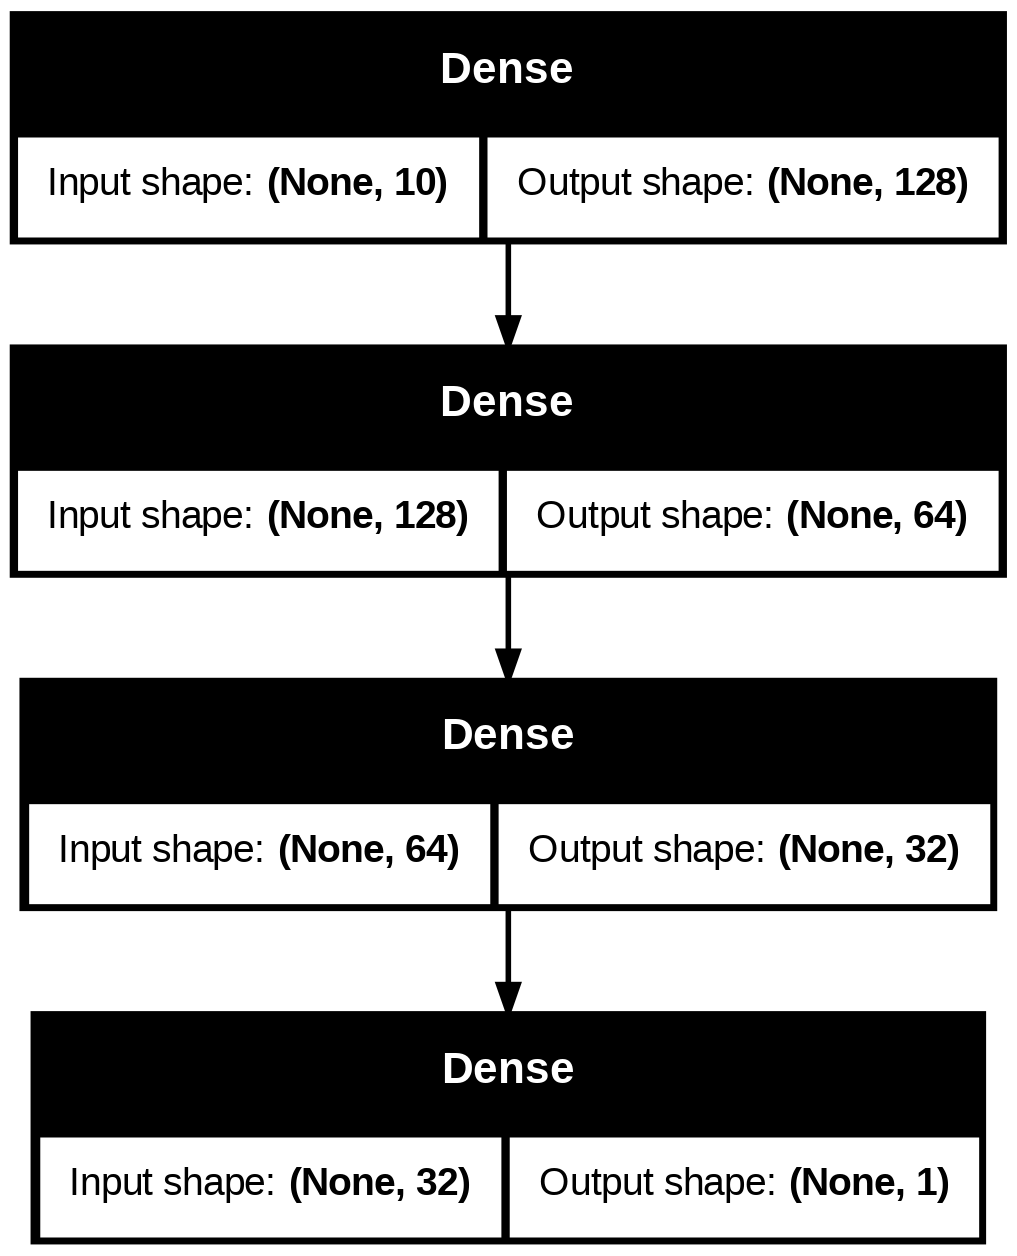

In [58]:
# Plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [59]:
# Early Stopping (Optional) callback to reduce overfitting
early_stopp = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=7, restore_best_weights=True)

# Compiling
model.compile(loss='mse',
              optimizer='adam', 
              metrics=['mae'])
# Training
history = model.fit(X_train_df, y_train,
                    validation_data=(X_valid_df, y_valid), epochs=20, batch_size=32,
                    callbacks=[early_stopp])

Epoch 1/20


I0000 00:00:1745527982.282290      96 service.cc:148] XLA service 0x789a6c00b720 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745527982.282930      96 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745527982.496121      96 cuda_dnn.cc:529] Loaded cuDNN version 90300


 102/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3269.4241 - mae: 50.8185

I0000 00:00:1745527983.118834      96 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1600/1600 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 583.7988 - mae: 13.1176 - val_loss: 2.5465 - val_mae: 1.0065
Epoch 2/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9074 - mae: 0.9086 - val_loss: 1.2573 - val_mae: 0.6525
Epoch 3/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.2418 - mae: 0.6986 - val_loss: 0.8629 - val_mae: 0.5121
Epoch 4/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.7886 - mae: 0.5522 - val_loss: 0.5848 - val_mae: 0.4250
Epoch 5/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6133 - mae: 0.5093 - val_loss: 0.4984 - val_mae: 0.4050
Epoch 6/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3942 - mae: 0.4066 - val_loss: 0.2987 - val_mae: 0.3679
Epoch 7/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2446 - mae: 0.3335 - val_loss: 0.1562 - val_mae: 0.2662
Epoch 8/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1412 - mae: 0.2635 - val_loss: 0.0731 - val_mae: 0.1849
Epoch 9/20
1600/1600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms

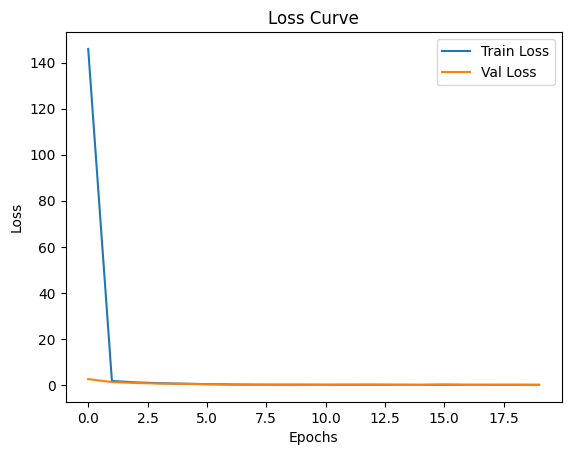

In [60]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [61]:
test_loss, test_mae = model.evaluate(X_test_df, y_test)
print(f"Test Loss (MSE): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0158 - mae: 0.0720
Test Loss (MSE): 0.0147
Test MAE: 0.0713


# ML Models

In [62]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [63]:
## build models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(random_state=537),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=537),
}

results = {}

for name, model in models.items():
    model.fit(X_train_df, y_train)
    y_pred = model.predict(X_valid_df)
    mse = mean_squared_error(y_valid, y_pred)
    r2 = r2_score(y_valid, y_pred)
    results[name] = {"MSE": mse, "R2": r2}
    print(f"\n{name}")
    print("MSE:", mse)
    print("R2 Score:", r2)


Linear Regression
MSE: 36.03420154458033
R2 Score: 0.9326756128560115

Ridge Regression
MSE: 36.03421052433856
R2 Score: 0.9326755960787084

Decision Tree
MSE: 25.9037181015625
R2 Score: 0.9516028697408273

Random Forest
MSE: 6.409100118002342
R2 Score: 0.9880255779483514

Gradient Boosting
MSE: 4.731010175740014
R2 Score: 0.9911608320151172


# Summary of ML Model

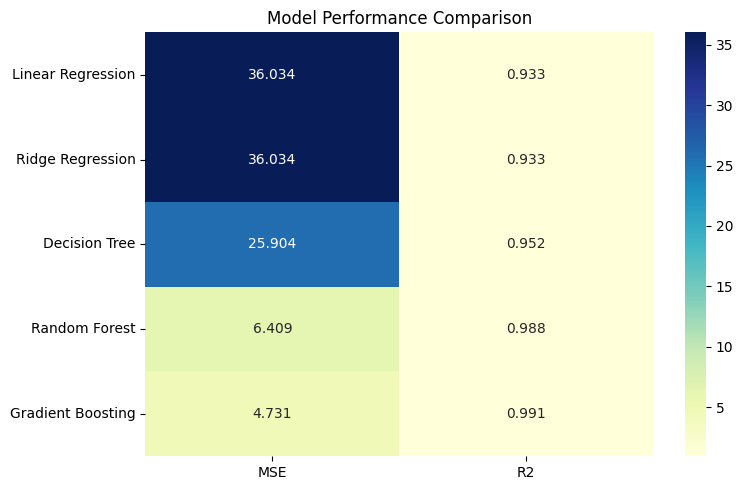

In [64]:
score_matrix = pd.DataFrame(results).T
plt.figure(figsize=(8,5))
sns.heatmap(score_matrix, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Performance Comparison")
plt.tight_layout()
plt.show()

# Thank you..pls upvote